In [287]:
# Imports:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [288]:
# Define excel path

excelPaths = pathlib.Path('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/presentations/update_slides')
excelPath = excelPaths.joinpath('2023C3_NEXAFS_summary.xlsx')
outPath = pathlib.Path('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/rsoxs_suite/nexafs_plots/2023C3/bar_plot_tilt_summaries')

In [289]:
# Function to determine the color and alpha based on tilt angle and quality
def get_bar_properties(tilt_angle, quality):
    # Determine the color
    color = 'red' if tilt_angle <= 55 else 'blue'
    
    # Determine the alpha (opacity)
    alpha = quality / 5.0  # Since 5 is the highest quality
    
    return color, alpha

In [290]:
# df = pd.read_excel(excelPath, sheet_name='Carbon NEXAFS')
df = pd.read_excel(excelPath, sheet_name='Nitrogen NEXAFS')

display(df)

,Nitrogen NEXAFS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Sample Name,RSoXS Chamber TRMSN,NaN,RSoXS Chamber TEY,NaN,NEXAFS Chamber TEY,NaN,NEXAFS Chamber PEY,NaN,NEXAFS Chamber FY,NaN
1,NaN,Tilt Angles (α) [°],Quality (0-5),Tilt Angles (α) [°],Quality (0-5),Tilt Angles (α) [°],Quality (0-5),Tilt Angles (α) [°],Quality (0-5),Tilt Angles (α) [°],Quality (0-5)
2,Y6 CB 2000,"(50, 56, 48)",2,"(53, 55.4, 53)",3,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CB 2500,"(53, 55.5, 53)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y6 CB 3000,"(51, 56, 51)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CBCN,"(45, 55.2, 48)",2,"(45, 56, 49)",3,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CF 2000,"(33, 60, 33)",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Y6 CF 2500,"(30, 64, 29)",4,"(40, 60, 44)",5,NaN,NaN,NaN,NaN,NaN,NaN
8,Y6 CFCN,"(43, 60, 45)",4,"(45, 55.5, 46)",4,NaN,NaN,NaN,NaN,NaN,NaN
9,Y6BO CB 2500,"(33, 63, 38)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
# Modify the list comprehension for new_columns
new_columns = []
for i in range(df.shape[1]):
    if str(df.iloc[0, i]) == 'nan':
        # When it's nan, repeat the last non-nan value (if there is one)
        new_columns.append(str(df.iloc[0, i-1]) + ' ' + str(df.iloc[1, i]))
    elif str(df.iloc[0,i]) == 'Sample Name':
        new_columns.append(str(df.iloc[0,i]))
    else:
        new_columns.append(str(df.iloc[0, i]) + ' ' + str(df.iloc[1, i]))

# Assign the new column names
df.columns = new_columns

# Drop the two rows you used for the column names
df = df.drop([0, 1]).reset_index(drop=True)

display(df)
# new_columns

,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
0,Y6 CB 2000,"(50, 56, 48)",2,"(53, 55.4, 53)",3,NaN,NaN,NaN,NaN,NaN,NaN
1,Y6 CB 2500,"(53, 55.5, 53)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y6 CB 3000,"(51, 56, 51)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CBCN,"(45, 55.2, 48)",2,"(45, 56, 49)",3,NaN,NaN,NaN,NaN,NaN,NaN
4,Y6 CF 2000,"(33, 60, 33)",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CF 2500,"(30, 64, 29)",4,"(40, 60, 44)",5,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CFCN,"(43, 60, 45)",4,"(45, 55.5, 46)",4,NaN,NaN,NaN,NaN,NaN,NaN
7,Y6BO CB 2500,"(33, 63, 38)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Y6BO CB 3000,"(31, 61, 40)",4,"(33, 51, 42)",2,NaN,NaN,NaN,NaN,NaN,NaN
9,Y6BO CBCN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
condition = ~(df['RSoXS Chamber TEY Quality (0-5)'].isna() & 
              df['NEXAFS Chamber TEY Quality (0-5)'].isna() & 
              df['NEXAFS Chamber PEY Quality (0-5)'].isna() & 
             df['NEXAFS Chamber FY Quality (0-5)'].isna())
condition

df_filtered = df[condition]
df_filtered

,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
0,Y6 CB 2000,"(50, 56, 48)",2,"(53, 55.4, 53)",3,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CBCN,"(45, 55.2, 48)",2,"(45, 56, 49)",3,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CF 2500,"(30, 64, 29)",4,"(40, 60, 44)",5,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CFCN,"(43, 60, 45)",4,"(45, 55.5, 46)",4,NaN,NaN,NaN,NaN,NaN,NaN
8,Y6BO CB 3000,"(31, 61, 40)",4,"(33, 51, 42)",2,NaN,NaN,NaN,NaN,NaN,NaN
10,Y6BO CF 2500,"(31, 62, 30)",4,"(42, 60, 46)",4,NaN,NaN,NaN,NaN,NaN,NaN
12,Y7 CB 2000,NaN,0,"(40, 58, 43)",4,"(52, 56.5, 53)",5,"(48, 58, 50)",5,"(52, 56, 52)",3
13,Y7 CBCN,NaN,0,NaN,NaN,"(54, 55.04, 54.4)",5,"(53, 55.3, 53.9)",5,"(55.2, 55.7, 54.8)",4
16,Y7 CF 3000,"(37, 60, 44)",3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
17,Y7 CFCN,NaN,0,"(42, 51, 46)",3,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
# Carbon
# df_groups = [[0, 3, 5, 6],
#              [8, 10],
#              [12, 13, 16, 17],
#              [20, 24], 
#              [26, 27, 28, 29],
#              [30, 31, 32, 33], 
#              [34, 35, 36, 37],
#              [38, 39, 40, 41],
#              [42, 43, 44, 45]]

# Nitrogen
df_groups = [[0, 3, 5, 6], 
             [8, 10],
             [12, 13, 16, 17],
             [18, 20, 24],
             [30, 32],
             [42, 43, 44, 45]]

for grouping in df_groups:
    # df_group = df_filtered.loc[grouping]
    df_group = df.loc[grouping]
    display(df_group)

,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
0,Y6 CB 2000,"(50, 56, 48)",2,"(53, 55.4, 53)",3,NaN,NaN,NaN,NaN,NaN,NaN
3,Y6 CBCN,"(45, 55.2, 48)",2,"(45, 56, 49)",3,NaN,NaN,NaN,NaN,NaN,NaN
5,Y6 CF 2500,"(30, 64, 29)",4,"(40, 60, 44)",5,NaN,NaN,NaN,NaN,NaN,NaN
6,Y6 CFCN,"(43, 60, 45)",4,"(45, 55.5, 46)",4,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
8,Y6BO CB 3000,"(31, 61, 40)",4,"(33, 51, 42)",2,NaN,NaN,NaN,NaN,NaN,NaN
10,Y6BO CF 2500,"(31, 62, 30)",4,"(42, 60, 46)",4,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
12,Y7 CB 2000,NaN,0,"(40, 58, 43)",4,"(52, 56.5, 53)",5,"(48, 58, 50)",5,"(52, 56, 52)",3
13,Y7 CBCN,NaN,0,NaN,NaN,"(54, 55.04, 54.4)",5,"(53, 55.3, 53.9)",5,"(55.2, 55.7, 54.8)",4
16,Y7 CF 3000,"(37, 60, 44)",3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
17,Y7 CFCN,NaN,0,"(42, 51, 46)",3,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
18,Y7BO CB 2000,"(31, 62, 35)",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Y7BO CB 3000,"(34, 60, 39)",4,"(40, 57, 44)",3,NaN,NaN,NaN,NaN,NaN,NaN
24,Y7BO CF 3000,"(35, 63, 31)",3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
30,PM6:Y6 CB,"(49, 57, 47)",4,"(55.5, 55.5, 55.5)",1,NaN,NaN,NaN,NaN,NaN,NaN
32,PM6:Y6 CF,"(36, 62, 29)",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Sample Name,RSoXS Chamber TRMSN Tilt Angles (α) [°],RSoXS Chamber TRMSN Quality (0-5),RSoXS Chamber TEY Tilt Angles (α) [°],RSoXS Chamber TEY Quality (0-5),NEXAFS Chamber TEY Tilt Angles (α) [°],NEXAFS Chamber TEY Quality (0-5),NEXAFS Chamber PEY Tilt Angles (α) [°],NEXAFS Chamber PEY Quality (0-5),NEXAFS Chamber FY Tilt Angles (α) [°],NEXAFS Chamber FY Quality (0-5)
42,PM6:Y7BO CB,"(30, 60, 55)",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,PM6:Y7BO CBCN,"(48, 59, 42)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,PM6:Y7BO CF,"(29, 62, 23)",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,PM6:Y7BO CFCN,"(63, 55, 55)",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


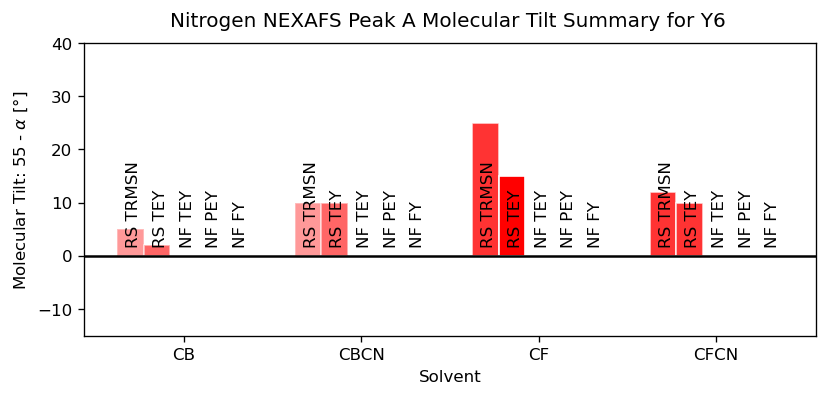

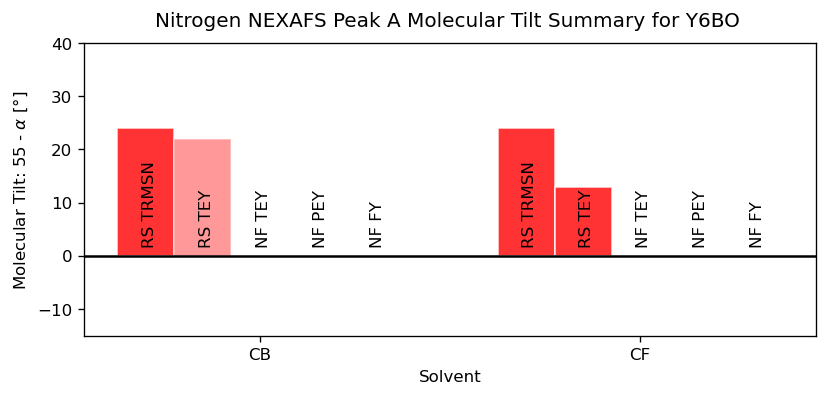

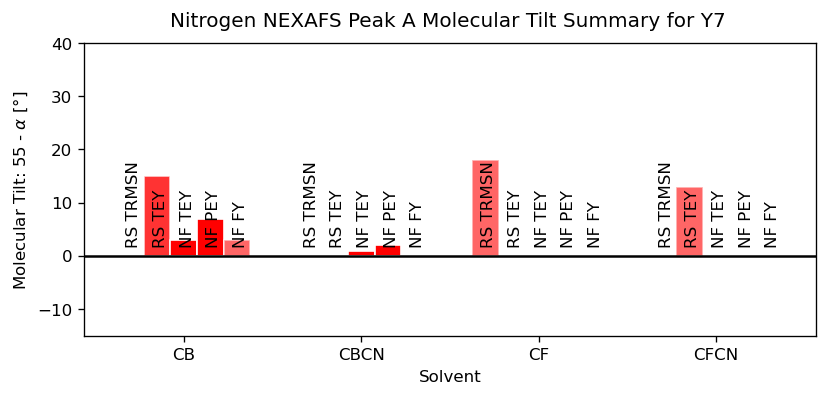

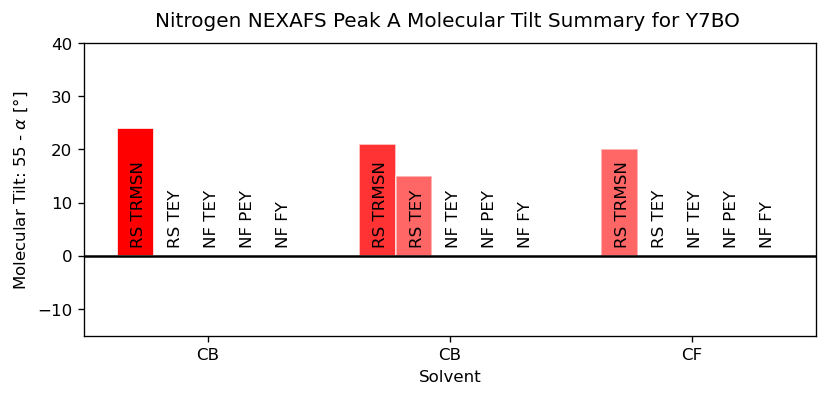

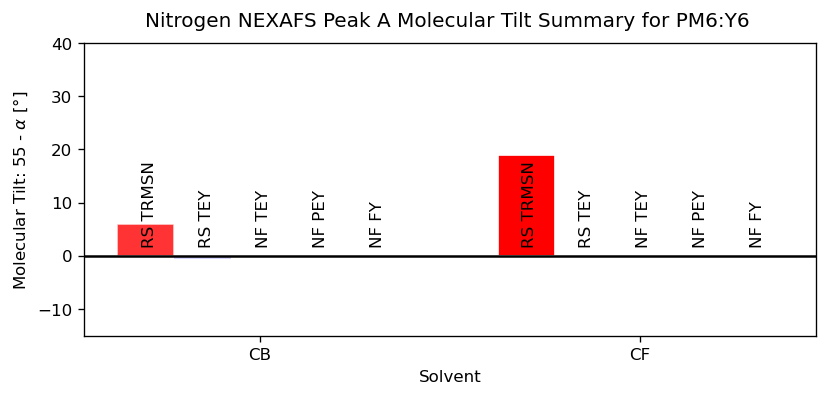

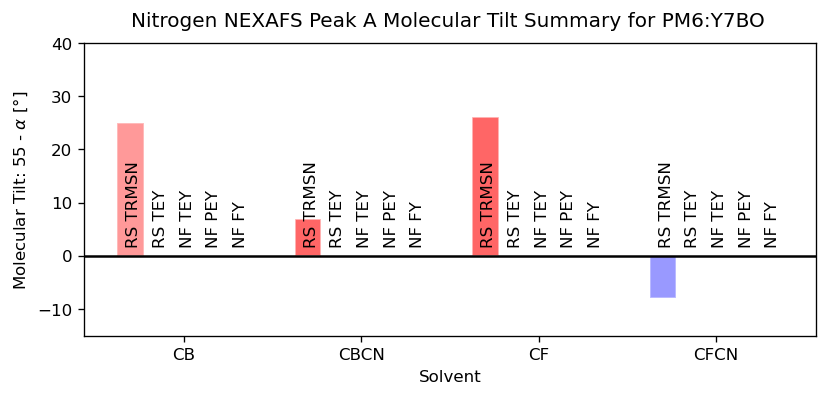

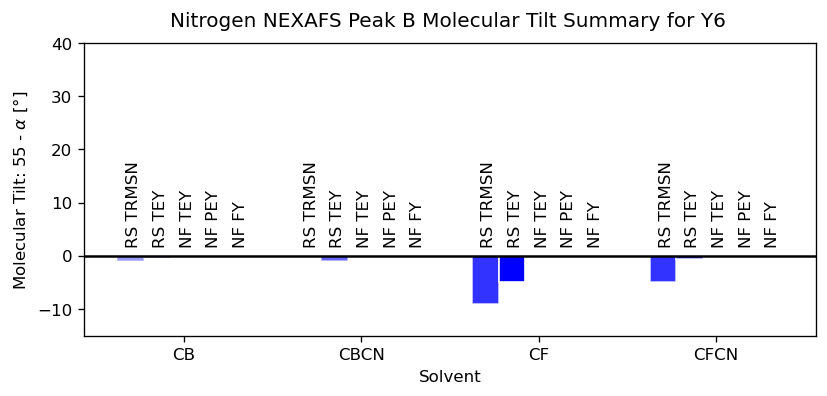

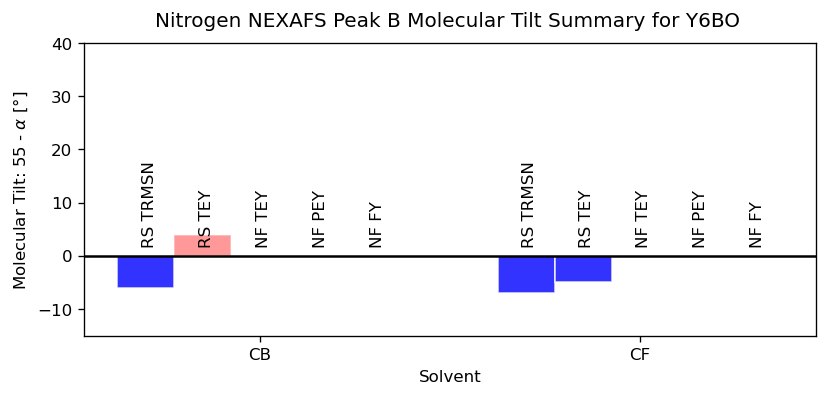

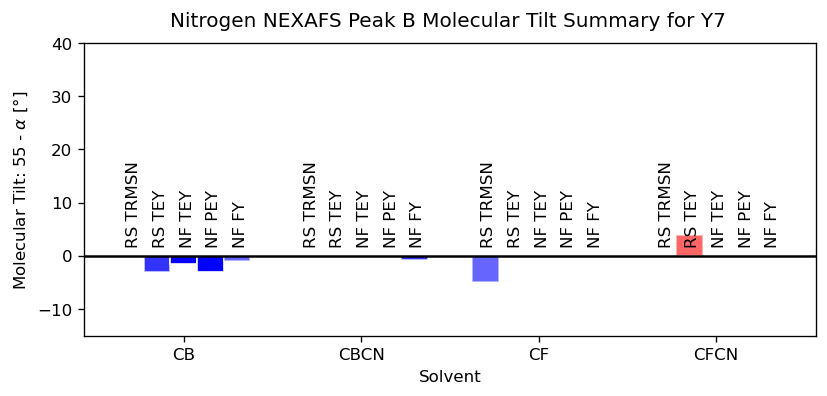

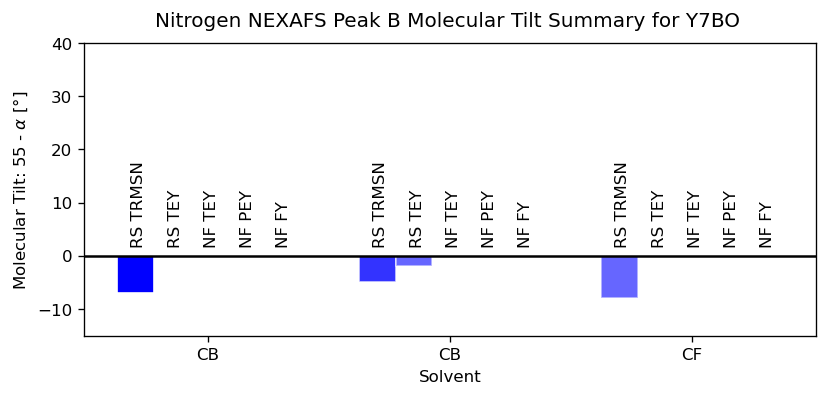

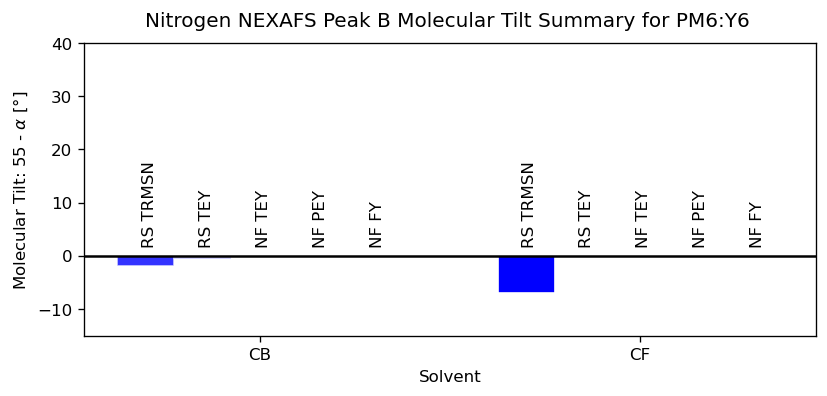

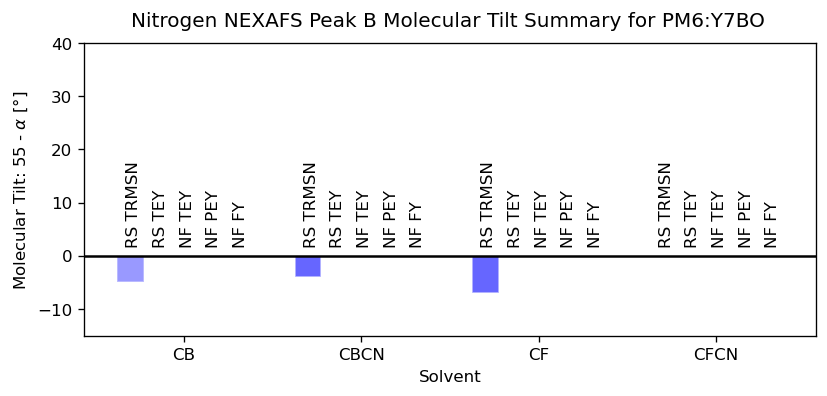

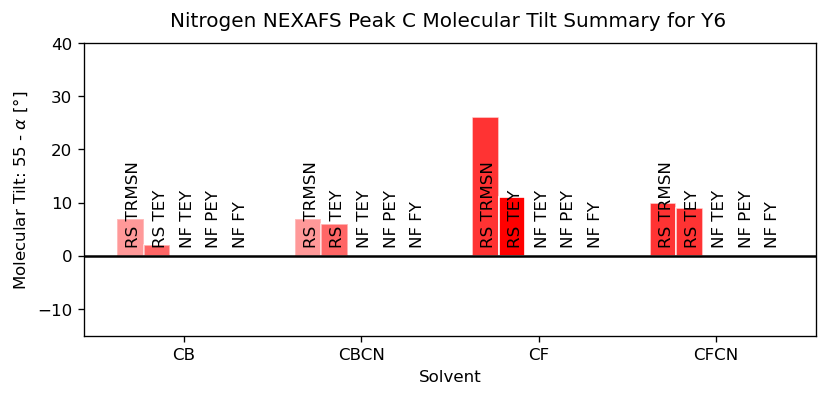

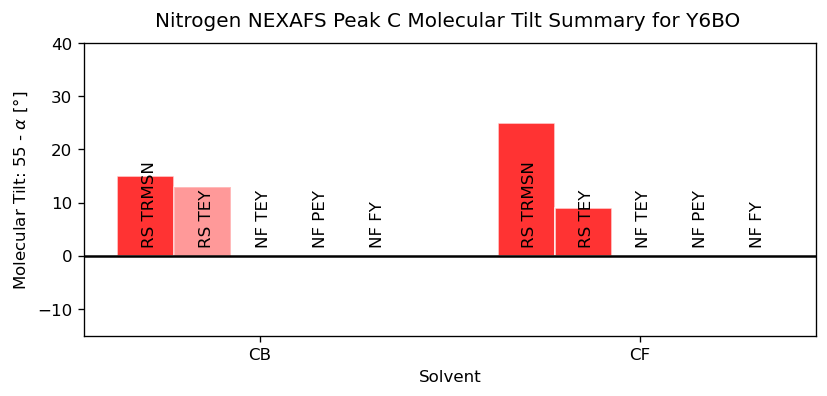

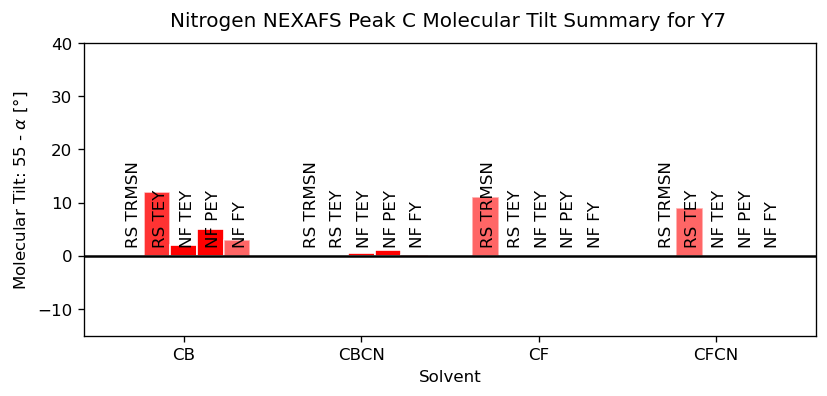

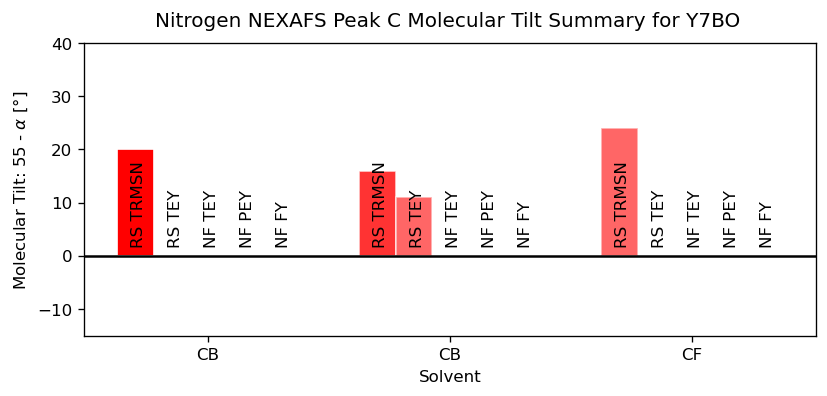

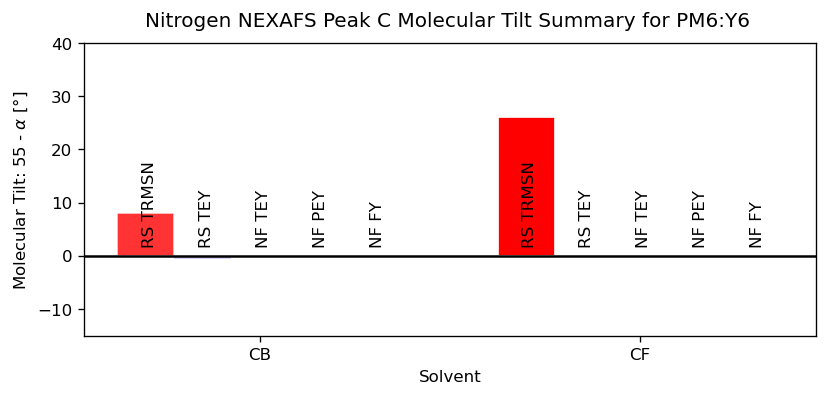

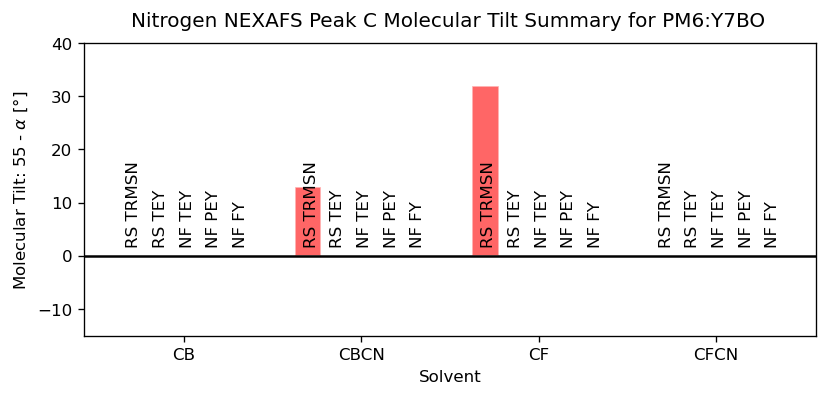

In [300]:
# Plotting for nitrogen

for peak_index, peak_name in enumerate(['Peak A', 'Peak B', 'Peak C']):
    for grouping in df_groups:
        df_group = df.loc[grouping]
        composition = df_group['Sample Name'].iloc[0].split(' ')[0]
        solvents = []
        for sample_name in df_group['Sample Name']:
            solvent = sample_name.split(' ')[1]
            solvents.append(solvent)

        # Set up the figure and axis
        fig, ax = plt.subplots(figsize=(7, 3.5))
        fig.set(tight_layout=True, dpi=120)
        fig.suptitle(f'Nitrogen NEXAFS {peak_name} Molecular Tilt Summary for {composition}', y=0.93, x=0.54)

        # Bar width and positions
        bar_width = 0.15
        ind = np.arange(len(df_group))  # Indexes for sample names

        measurements = [
            ('RSoXS Chamber TRMSN Tilt Angles (α) [°]', 'RSoXS Chamber TRMSN Quality (0-5)'),
            ('RSoXS Chamber TEY Tilt Angles (α) [°]', 'RSoXS Chamber TEY Quality (0-5)'),
            ('NEXAFS Chamber TEY Tilt Angles (α) [°]', 'NEXAFS Chamber TEY Quality (0-5)'),
            ('NEXAFS Chamber PEY Tilt Angles (α) [°]', 'NEXAFS Chamber PEY Quality (0-5)'),
            ('NEXAFS Chamber FY Tilt Angles (α) [°]', 'NEXAFS Chamber FY Quality (0-5)')
        ]

        annotation_key = {'RSoXS Chamber TRMSN Tilt Angles (α) [°]': 'RS TRMSN',
                          'RSoXS Chamber TEY Tilt Angles (α) [°]': 'RS TEY', 
                          'NEXAFS Chamber TEY Tilt Angles (α) [°]': 'NF TEY', 
                          'NEXAFS Chamber PEY Tilt Angles (α) [°]': 'NF PEY', 
                          'NEXAFS Chamber FY Tilt Angles (α) [°]': 'NF FY'}

        # Iterate over each measurement
        for i, (angle_col, quality_col) in enumerate(measurements):
            # List to store bar properties
            heights = []
            colors = []
            alphas = []

            for index, row in df_group.iterrows():
                quality = row[quality_col]

                if str(row[angle_col])=='nan':
                    heights.append(0)
                    colors.append('white')
                    alphas.append(0)       
                else:
                    tilt_angle = ast.literal_eval(row[angle_col])[peak_index]
                    color, alpha = get_bar_properties(tilt_angle, quality)
                    height = 55 - tilt_angle

                    heights.append(height)
                    colors.append(color)
                    alphas.append(alpha)

            # Plot the bars for this measurement
            for sample_index, (height, color, alpha) in enumerate(zip(heights, colors, alphas)):
                ax.bar(sample_index + i*bar_width, height, bar_width, color=color, alpha=alpha, edgecolor="white", linewidth=1)
                # ax.annotate(' '.join(angle_col.split(' ')[0:3]), 
                ax.annotate(annotation_key[angle_col], 
                            xy=(sample_index + i*bar_width, 0), 
                            xytext=(2,5), 
                            textcoords="offset points", 
                            ha='center', va='bottom', 
                            rotation=90)        

        # Position the x-axis at y=0 which corresponds to 55 degrees in our plot
        ax.axhline(0, color='black')  # Adds the x-axis at the value of 55

        # Set x-ticks to be the sample names, adjusting position to center them amongst the bars
        ax.set_xticks(ind + bar_width*2)
        # ax.set_xticklabels(df_group['Sample Name'], rotation=45, ha="right")
        # ax.set_xticklabels(solvents, rotation=0, ha="right")
        ax.set_xticklabels(solvents)



        # Optional: You can also set the y-tick labels to indicate the actual tilt angles
        # current_y_ticks = ax.get_yticks()
        # ax.set_yticklabels([int(55 + y_val) for y_val in current_y_ticks])

        ax.set(ylabel=r'Molecular Tilt: 55 - $\alpha$ [°]', ylim=(-15, 40), xlabel='Solvent')
        plt.savefig(outPath.joinpath('nitrogen', f'{composition}_nitrogen_{peak_name}_nexafs_summary.png'), dpi=150)

        plt.show()
        # fname = f'{composition}_carbon_nexafs_summary'
        plt.close('all')

In [298]:
outPath

PosixPath('/Users/andrew/Library/CloudStorage/OneDrive-UCB-O365/research/data_analysis/rsoxs_suite/nexafs_plots/2023C3/bar_plot_tilt_summaries')

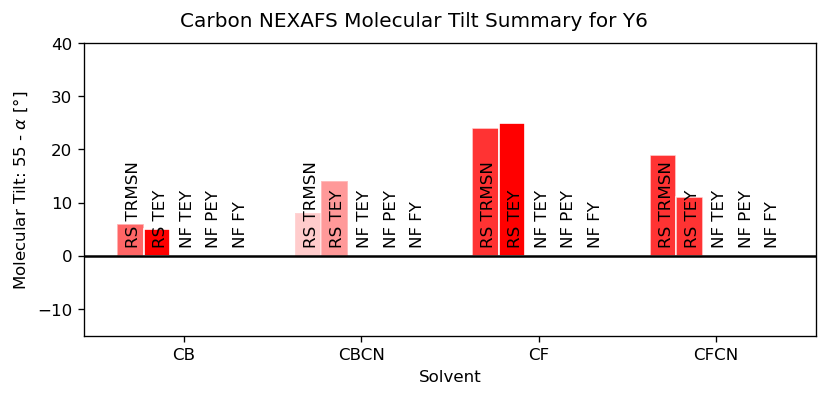

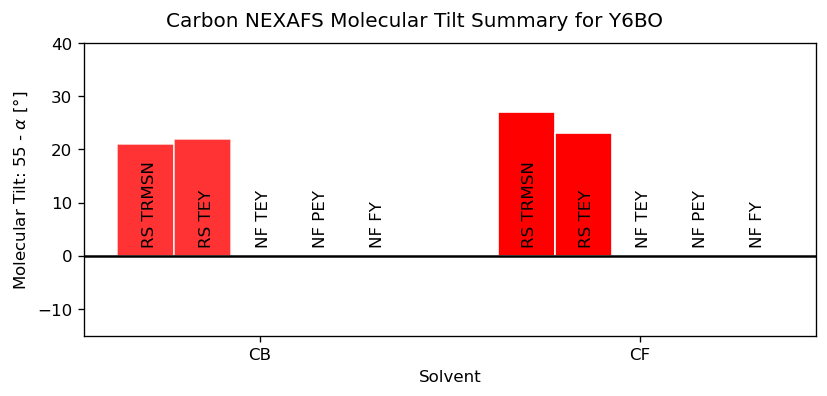

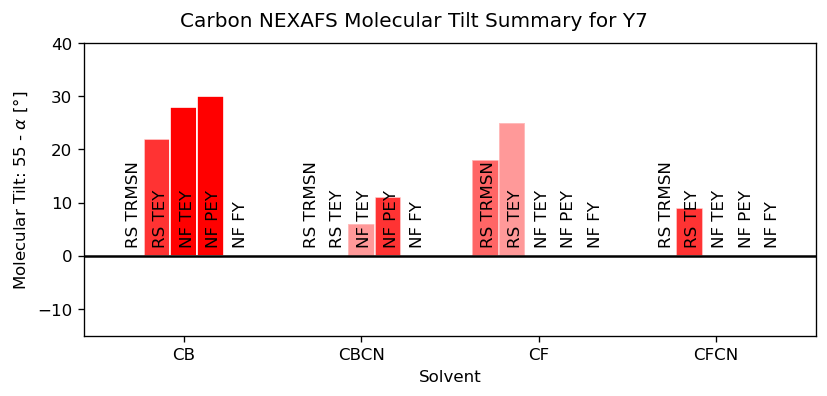

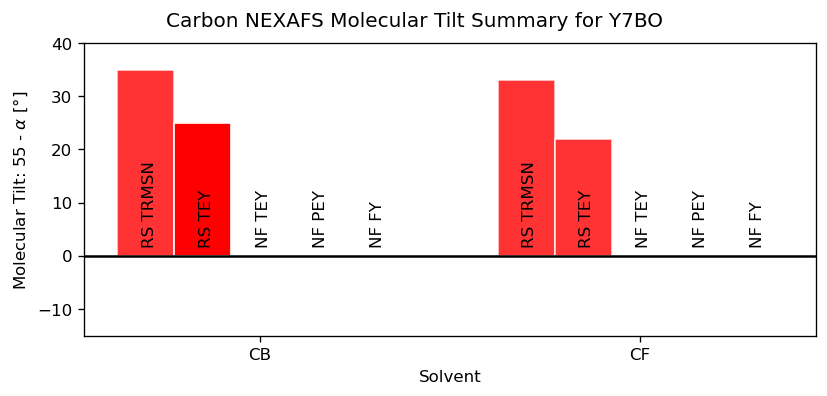

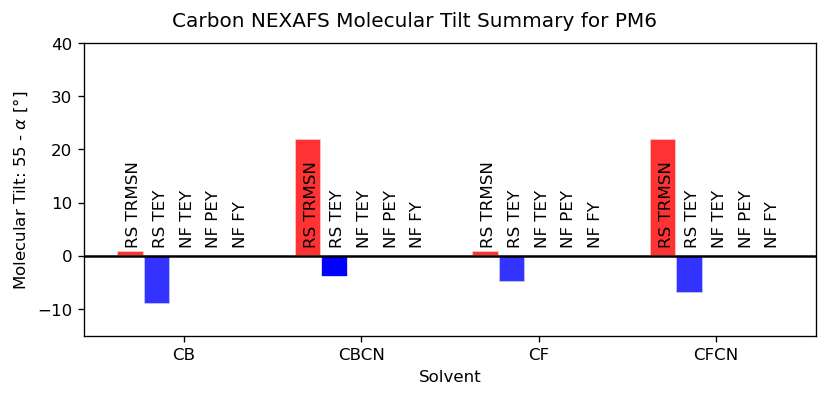

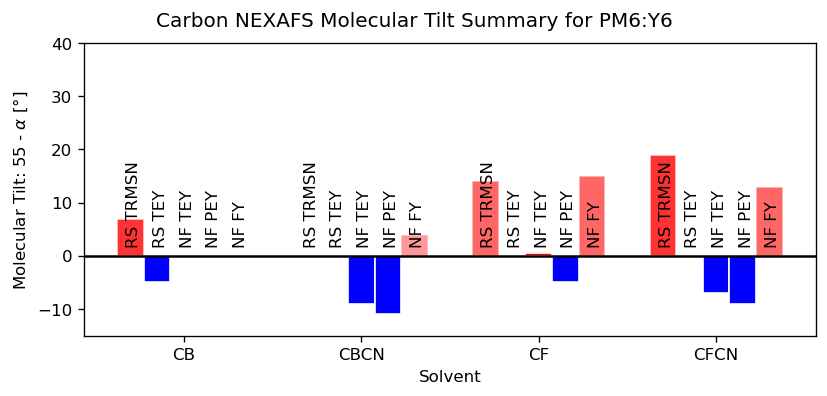

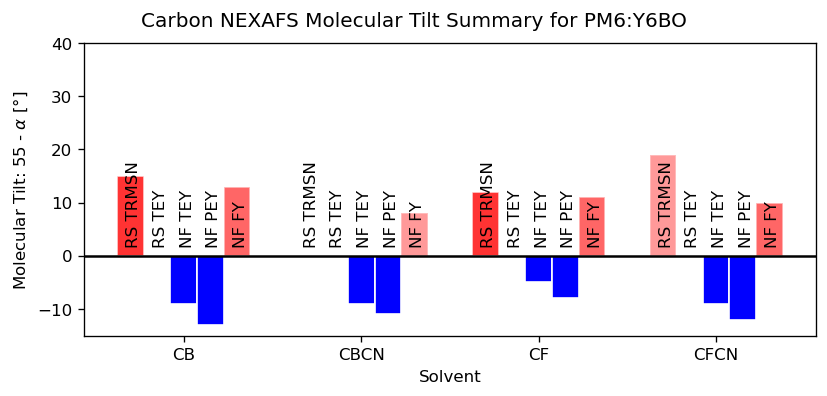

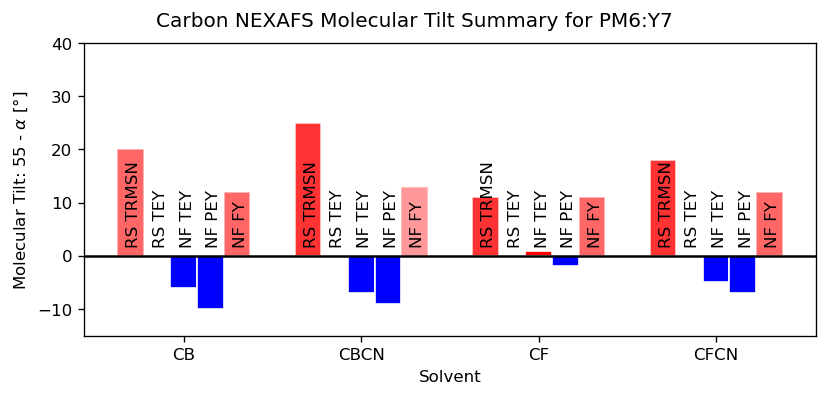

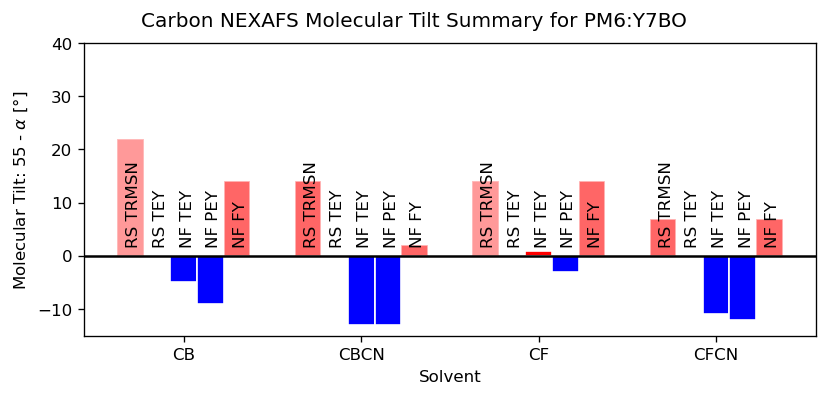

In [260]:
# Plotting for carbon

for grouping in df_groups:
    df_group = df_filtered.loc[grouping]
    composition = df_group['Sample Name'].iloc[0].split(' ')[0]
    solvents = []
    for sample_name in df_group['Sample Name']:
        solvent = sample_name.split(' ')[1]
        solvents.append(solvent)
        
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(7, 3.5))
    fig.set(tight_layout=True, dpi=120)
    fig.suptitle(f'Carbon NEXAFS Molecular Tilt Summary for {composition}', y=0.93)

    # Bar width and positions
    bar_width = 0.15
    ind = np.arange(len(df_group))  # Indexes for sample names

    measurements = [
        ('RSoXS Chamber TRMSN Tilt Angle (α) [°]', 'RSoXS Chamber TRMSN Quality (0-5)'),
        ('RSoXS Chamber TEY Tilt Angle (α) [°]', 'RSoXS Chamber TEY Quality (0-5)'),
        ('NEXAFS Chamber TEY Tilt Angle (α) [°]', 'NEXAFS Chamber TEY Quality (0-5)'),
        ('NEXAFS Chamber PEY Tilt Angle (α) [°]', 'NEXAFS Chamber PEY Quality (0-5)'),
        ('NEXAFS Chamber FY Tilt Angle (α) [°]', 'NEXAFS Chamber FY Quality (0-5)')
    ]

    annotation_key = {'RSoXS Chamber TRMSN Tilt Angle (α) [°]': 'RS TRMSN',
                      'RSoXS Chamber TEY Tilt Angle (α) [°]': 'RS TEY', 
                      'NEXAFS Chamber TEY Tilt Angle (α) [°]': 'NF TEY', 
                      'NEXAFS Chamber PEY Tilt Angle (α) [°]': 'NF PEY', 
                      'NEXAFS Chamber FY Tilt Angle (α) [°]': 'NF FY'}

    # Iterate over each measurement
    for i, (angle_col, quality_col) in enumerate(measurements):
        # List to store bar properties
        heights = []
        colors = []
        alphas = []

        for index, row in df_group.iterrows():
            tilt_angle = row[angle_col]
            # print(tilt_angle)
            quality = row[quality_col]

            if np.isnan(tilt_angle) or quality == 0:
                heights.append(0)
                colors.append('white')
                alphas.append(0)
            else:
                color, alpha = get_bar_properties(tilt_angle, quality)
                height = 55 - tilt_angle

                heights.append(height)
                colors.append(color)
                alphas.append(alpha)

        # Plot the bars for this measurement
        for sample_index, (height, color, alpha) in enumerate(zip(heights, colors, alphas)):
            ax.bar(sample_index + i*bar_width, height, bar_width, color=color, alpha=alpha, edgecolor="white", linewidth=1)
            # ax.annotate(' '.join(angle_col.split(' ')[0:3]), 
            ax.annotate(annotation_key[angle_col], 
                        xy=(sample_index + i*bar_width, 0), 
                        xytext=(2,5), 
                        textcoords="offset points", 
                        ha='center', va='bottom', 
                        rotation=90)        

    # Position the x-axis at y=0 which corresponds to 55 degrees in our plot
    ax.axhline(0, color='black')  # Adds the x-axis at the value of 55

    # Set x-ticks to be the sample names, adjusting position to center them amongst the bars
    ax.set_xticks(ind + bar_width*2)
    # ax.set_xticklabels(df_group['Sample Name'], rotation=45, ha="right")
    # ax.set_xticklabels(solvents, rotation=0, ha="right")
    ax.set_xticklabels(solvents)



    # Optional: You can also set the y-tick labels to indicate the actual tilt angles
    # current_y_ticks = ax.get_yticks()
    # ax.set_yticklabels([int(55 + y_val) for y_val in current_y_ticks])

    ax.set(ylabel=r'Molecular Tilt: 55 - $\alpha$ [°]', ylim=(-15, 40), xlabel='Solvent')
    plt.savefig(outPath.joinpath('carbon', f'{composition}_carbon_nexafs_summary.png'), dpi=150)

    plt.show()
    # fname = f'{composition}_carbon_nexafs_summary'
    plt.close('all')